<a href="https://colab.research.google.com/github/ArnyWu/-Preview-AI-/blob/main/%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

資料集欄位:
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')
訓練集的欄位型態:
                ColumnName     Type
0                 Survived    int64
1                   Pclass    int64
5  Siblings/Spouses Aboard    int64
6  Parents/Children Aboard    int64
4                      Age  float64
7                     Fare  float64
2                     Name   object
3                      Sex   object
訓練集缺失值統計:
Empty DataFrame
Columns: [ColumnName, MissingCount, Percentage(%)]
Index: []
測試集缺失值統計:
Empty DataFrame
Columns: [ColumnName, MissingCount, Percentage(%)]
Index: []


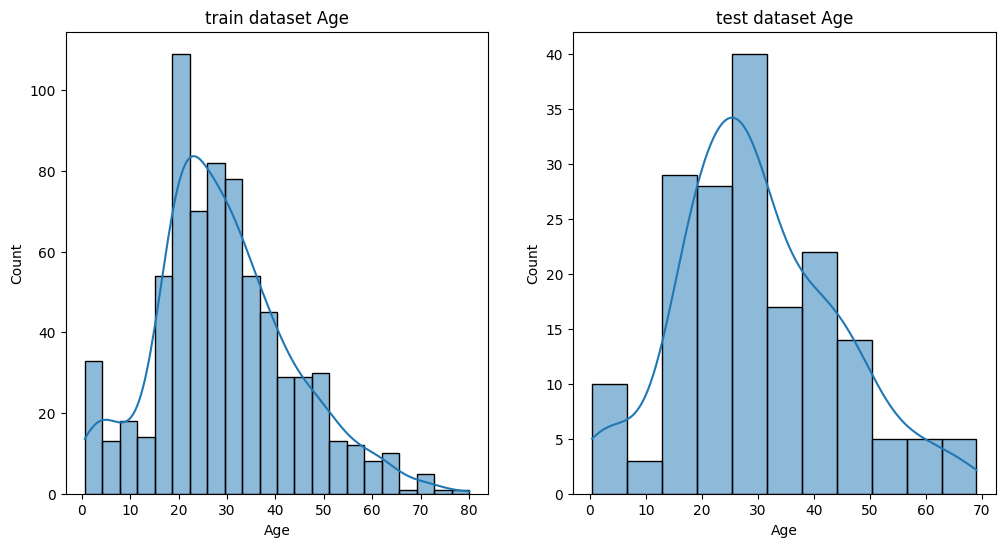

模型的準確性: 0.75


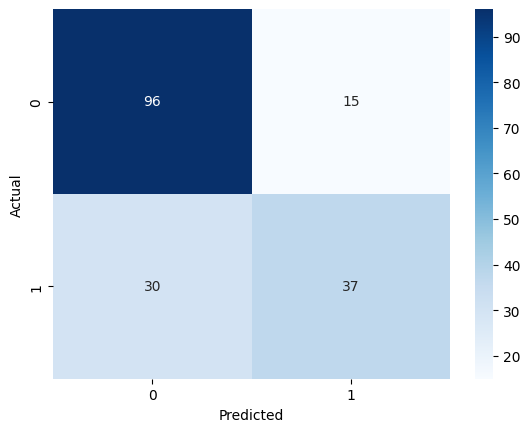

In [7]:
# 載入所需的函式庫
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 定義判別欄位型態的函數
def Col_Types(data):
    Column_Types = data.dtypes.to_frame().reset_index()   # 判別每個欄位的型態
    Column_Types.columns = ['ColumnName', 'Type']
    Column_Types.sort_values(by='Type', inplace=True)
    return Column_Types

# 定義用來統計欄位缺漏值總數的函數
def Missing_Counts(data):
    missing = data.isnull().sum()  # 計算欄位中缺漏值的數量
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)

    Missing_Count = pd.DataFrame({
        'ColumnName': missing.index,
        'MissingCount': missing.values
    })  # Convert Series to DataFrame
    Missing_Count['Percentage(%)'] = Missing_Count['MissingCount'].apply(lambda x: round(x / data.shape[0] * 100, 2))
    return Missing_Count

# 載入資料集
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
data = pd.read_csv(url)

# 查看資料集的欄位
print("資料集欄位:")
print(data.columns)

# 分割資料集
df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)

# 顯示訓練集的欄位型態
print("訓練集的欄位型態:")
print(Col_Types(df_train))

# 檢查訓練集和測試集的缺失值
print('訓練集缺失值統計:')
print(Missing_Counts(df_train))

print('測試集缺失值統計:')
print(Missing_Counts(df_test))

# 資料預處理

# 1. 將類別資料轉換為數字資料
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

# 2. 資料分佈圖
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_train['Age'], kde=True)
plt.title('train dataset Age')

plt.subplot(1, 2, 2)
sns.histplot(df_test['Age'], kde=True)
plt.title('test dataset Age')
plt.show()

# 3. 選擇特徵和標籤
features = ['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
X_train = df_train[features]
y_train = df_train['Survived']
X_test = df_test[features]
y_test = df_test['Survived']

# 4. 標準化數據
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 訓練邏輯回歸模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型的準確性: {accuracy:.2f}")

# 繪製混淆矩陣
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()